## CHO

In [1]:
import csv
import numpy as np
import pandas as pd

with open('cho.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split('\t') for line in stripped if line)
    with open('test.csv', 'w') as out_file:
        writer = csv.writer(out_file)
#         writer.writerow(('title', 'intro'))
        writer.writerows(lines)
    
data = pd.read_csv("test.csv",header=None)

print(data)

# i=0
# while(i<len(data)):
#     if(data.iloc[i][1]==-1):
#         data.drop(data.index[i],inplace=True)
#         continue
#     else:
#         i=i+1
        
print(data.shape)

data_clean = np.zeros((data.shape[0],data.shape[1]-2))
for i in range(len(data)):
    for j in range(2,len(data.iloc[i])):
            data_clean[i][j-2] = data.iloc[i][j]
print(data_clean) 

print(data_clean.shape)

      0   1      2      3      4      5      6      7      8     9      10  \
0      1   1 -0.690 -0.960 -1.160 -0.660 -0.550  0.120 -1.070 -1.22  0.820   
1      2   1 -0.210  0.190  0.860  0.040 -0.350 -0.390 -0.510 -0.20  0.000   
2      3   1 -0.300 -0.560 -0.290 -0.500 -0.270 -0.290 -0.560 -1.04  0.320   
3      4   1  0.070  0.260 -0.470 -0.680 -0.630 -0.390  0.070  0.79  0.580   
4      5   1 -1.040  0.130  0.510 -0.440 -0.880 -0.320  0.210  0.95  1.070   
5      6   1 -1.170  0.090 -0.520 -1.040 -1.160 -0.830  0.170  0.93  0.890   
6      7   1 -0.160  0.350 -0.130 -0.260 -0.400 -0.470  0.100  0.74  0.450   
7      8   1 -0.890  0.770 -0.250 -0.710 -0.330  0.050 -0.150 -0.42  0.680   
8      9   1 -0.180  0.140 -0.040 -0.760 -0.680 -0.530 -0.370  0.19  0.810   
9     10   1 -0.420 -0.570  0.080 -0.440 -0.360 -0.180 -0.150  0.56  0.630   
10    11   1 -0.150  0.320  0.230 -0.760 -1.160 -0.900 -0.230  0.28  0.450   
11    12   1 -1.180 -1.020 -1.740 -1.690 -0.820 -0.190 -0.310  0

[[-0.69  -0.96  -1.16  ... -0.04   0.19   0.82 ]
 [-0.21   0.19   0.86  ... -1.23  -0.325  0.   ]
 [-0.3   -0.56  -0.29  ... -0.12  -0.16   0.67 ]
 ...
 [-3.12  -4.12  -3.54  ...  1.48   2.06   2.36 ]
 [-0.79  -0.56  -0.79  ...  0.49   0.08   0.15 ]
 [-1.16  -1.39  -0.96  ...  0.493  1.27   0.87 ]]
(386, 16)


In [23]:
import random
k=5
init_center=[]
centroids = dict()
for i in range(k):
    init_center.append(random.randrange(0, data_clean.shape[0]))
    centroids[i+1] = data_clean[init_center[i]]
print(init_center) 
print(centroids)

from operator import add 

def updateCentroid(cluslist,k):
    centroid=dict()
    for i in range(1,k+1):
        centroid[i] = [j for j, x in enumerate(cluslist) if x == i]
        

    for key, value in centroid.items():
        res=[0]*data_clean.shape[1]
        for item in value:
            result = list(map(add, res, data_clean[item])) 
            res=result
        res[:] = [x / len(value) for x in res]    
        centroids[key] = res 
    return centroids    
        
k=5
flag=False
while(True):
    cluslist=[]
    for i in range(data_clean.shape[0]):
        min = float("inf")
        for j in range(1,k+1):
            sum=0
            dist=0
            for m in range(len(data_clean[i])):
                sum=sum+(data_clean[i][m]-centroids[j][m])**2
            dist = sum**0.5  
            if(dist<min):
                min=dist
                cluster = j
        cluslist.append(cluster) 
    if(flag and (cluslist == prevcluslist)):
        break
    prevcluslist = cluslist.copy()  
    flag=True
    centroids = updateCentroid(cluslist,k)

    
print(cluslist)   
print(centroids)
                

[282, 292, 207, 203, 13]
{1: array([-0.98, -1.49, -0.83, -0.56, -0.38,  0.09,  1.23,  1.23,  1.25,
        0.01, -0.57,  0.01, -0.25,  0.45,  0.66,  0.25]), 2: array([-0.16 ,  1.09 ,  0.2  , -0.22 , -0.61 , -0.39 ,  0.15 ,  0.29 ,
        0.13 , -0.11 , -0.32 , -0.08 , -0.12 ,  0.23 ,  0.149,  0.   ]), 3: array([-0.44 , -0.25 ,  0.85 ,  0.63 ,  0.68 ,  0.71 ,  0.19 , -0.34 ,
       -0.58 , -0.14 ,  0.14 ,  0.4  ,  0.107, -0.23 , -0.34 , -0.78 ]), 4: array([-0.89 , -0.31 ,  0.69 ,  0.87 ,  1.17 ,  0.79 , -0.29 , -0.58 ,
       -1.   ,  0.2  ,  0.69 ,  0.61 ,  0.344,  0.06 , -0.51 , -0.74 ]), 5: array([ 0.43 , -0.38 , -1.12 , -0.92 , -1.15 , -1.19 , -0.49 ,  0.62 ,
        0.84 ,  0.67 ,  1.01 ,  0.95 ,  0.325,  0.38 , -0.21 , -0.08 ])}
[5, 4, 5, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 4, 2, 5, 4, 2, 1, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 5, 5, 2, 5, 5, 2, 5, 4, 5, 1, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,

In [24]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import multivariate_normal

# a = np.array([[0,0],[1, 1]])


# b = np.array([[[1.0,1.0],[1.0, 1.0]],[[2.0,2.0],[2.0,2.0]]])

# c = np.array([0.5, 0.5])


In [25]:
Mu = pd.DataFrame(centroids)
Mu.rename(columns=lambda x: x-1, inplace=True)
Mu = Mu.T
print(Mu.shape)
print(Mu)
Muu = np.zeros((Mu.shape[0],Mu.shape[1]))
for i in range(len(Mu)):
    for j in range(len(Mu.iloc[i])):
            Muu[i][j] = Mu.iloc[i][j]
print(Muu) 

(5, 16)
         0         1         2         3         4         5         6   \
0 -0.979818 -1.044614 -1.157955 -0.688636 -0.226364  0.307045  0.840227   
1  0.024706  0.136745 -0.242078 -0.493608 -0.376431 -0.276745  0.108784   
2 -0.599072 -0.474433 -0.065258  0.359072  0.605567  0.482371  0.225258   
3 -0.348774  0.082409  1.108759  0.586058 -0.018321 -0.206204 -0.511168   
4  0.045246 -0.354912 -0.700351 -0.660877 -0.581579 -0.413684 -0.518772   

         7         8         9         10        11        12        13  \
0  1.029545  0.855455 -0.135227 -0.400682 -0.060909  0.147386  0.464568   
1  0.421569  0.484863  0.036039 -0.152137 -0.315529 -0.208059  0.004608   
2 -0.012165 -0.230722 -0.253196  0.038670  0.250619  0.250021  0.095041   
3 -0.753883 -0.581825  0.703431  0.606555  0.253255 -0.053423 -0.341226   
4 -0.420175  0.150526  0.907193  0.590351  0.313246  0.082316  0.080035   

         14        15  
0  0.650409  0.505682  
1  0.176412  0.301373  
2  0.046742 -0.199

In [5]:
# Pi = [1/5]*5
# Pi = np.asarray([Pi])
# print(Pi.shape)

In [6]:
# Rik = np.zeros((len(data_clean),5))
# print(Rik.shape)

In [7]:
# BigSigma = np.zeros((5,data_clean.shape[1],data_clean.shape[1]))
# print(BigSigma.shape)

In [26]:
def Estep(data,K,mu,pi,BigSigma,exp):  
    for k in range(K):
        prior = pi[k]
        likelihood = multivariate_normal(mu[k],BigSigma[k]).pdf(data)
        exp[:, k] = prior * likelihood

    exp = exp / exp.sum(axis = 1, keepdims=1)

    return exp

def Mstep(data,K,rows,exp,BigSigma,smooth):
    rik_sum = exp.sum(axis = 0)
    pi = rik_sum / rows
    rikxi = np.dot(exp.T, data)
    mu = rikxi / rik_sum.reshape(-1, 1)
    for k in range(K):
        diff = (data - mu[k]).T
        rikxi = np.dot(exp[:, k] * diff, diff.T)
        BigSigma[k] = rikxi / rik_sum[k]
        BigSigma[k] += smooth*np.identity(len(data[0]))
        
        
    return pi,mu,BigSigma    


def calc_log_likelihood(data,K,mu,pi,BigSigma):
    log_likelihood = 0
#     for k in range(n_components):
#         pik = pi[k]
#         muk = mu[k]
#         BigSigmak = BigSigma[k]
#         BigSigmak_inverse = np.linalg.inv(BigSigmak)
#         term_other = np.pi * np.log(np.linalg.det(BigSigmak))
# #         term_other = np.log(2 * np.pi) + np.log(np.linalg.det(BigSigmak))
    
#         for x in data:
#             diff = x - muk
#             term_exponent = np.dot(diff.T, np.dot(BigSigmak_inverse, diff))
#             log_likelihood += ((-1 / 2) * term_exponent) - term_other
# #             log_likelihood += -1 / 2 * (term_other + term_exponent) + np.log(pik)
    for x in data:
        likelihoodsum=0
        for k in range(K):
            likelihoodsum += pi[k] * multivariate_normal(mu[k],BigSigma[k]).pdf(x)
        log_likelihood += np.log(likelihoodsum)    
    return log_likelihood



def ExpMax(data, K, conv_threshold, maxIter, smooth, seed):
    rows, cols = data.shape     
    exp = np.zeros((rows, K))   
    #     pi = np.ones(K)*1.0/K
#     sigma = []
#     for k in range(K):
#         sigma.append(np.cov(data.T))

#     mu = a.copy()
#     pi = c.copy()
#     BigSigma = np.zeros((shape))
#     for k in range(K):
#         BigSigma[k] = b[k].copy()
    np.random.seed(seed)
    mu = Muu
    pi = np.full(K, 1 / K)
    shape = K, cols, cols   
    BigSigma = np.full(shape, np.cov(data, rowvar = False))
    for k in range(K):
        BigSigma[k] += smooth*np.identity(len(data[0]))
    log_likelihood = 0
    converged = False
    log_likelihood_record = []      

    while(True):
        print("Hello")
        exp = Estep(data,K,mu,pi,BigSigma,exp)
        pi,mu,BigSigma = Mstep(data,K,rows,exp,BigSigma,smooth)
        log_likelihood_new = calc_log_likelihood(data,K,mu,pi,BigSigma)
        maxIter -= 1
        if(maxIter==0):
            break
        
        if (log_likelihood_new - log_likelihood) <= conv_threshold:
            converged = True
            break
        log_likelihood = log_likelihood_new
        log_likelihood_record.append(log_likelihood)
    return exp,log_likelihood_record, pi,mu,BigSigma


In [27]:
exp,log_likelihood_record,pi,mu,BigSigma = ExpMax(data_clean,5,1e-4,100,1e-6,4)


Hello


In [28]:
print(log_likelihood_record)
print(pi)
print(mu)
print(BigSigma)

[]
[0.12559425 0.17151422 0.249743   0.30234358 0.15080495]
[[-0.87769222 -0.86578955 -0.7698759  -0.47590209 -0.19729648  0.23234559
   0.63963978  0.73522093  0.60993425 -0.01594963 -0.26112327 -0.00861594
   0.1103062   0.3490014   0.46370331  0.36634311]
 [-0.07773405  0.0764946  -0.03949042 -0.27141836 -0.23595152 -0.21433679
   0.0113913   0.20687232  0.2685237   0.12607156 -0.00919403 -0.19262205
  -0.143013   -0.0497101   0.06033839  0.16549933]
 [-0.52961978 -0.39140943  0.03200523  0.337421    0.49134019  0.36159012
   0.10656611 -0.09418682 -0.23726356 -0.12626783  0.11358397  0.24379565
   0.20154976  0.04536038 -0.00751379 -0.18525726]
 [-0.39417835  0.00102638  0.95813252  0.52225104 -0.01189875 -0.15805256
  -0.42352689 -0.65238633 -0.50972207  0.65314507  0.55273039  0.25472552
  -0.02917076 -0.29036528 -0.50278037 -0.36664414]
 [-0.00705158 -0.33375211 -0.56024528 -0.52327505 -0.46158322 -0.3286341
  -0.47827981 -0.44209642  0.06649309  0.82084546  0.56556609  0.309726

In [29]:
# print(list(gmm.resp[0]).index(max(gmm.resp[0])))
print(list(exp[0]).index(max(exp[0])))

4


In [30]:
labels=[-1]*len(data_clean)
for i in range(len(data_clean)):
#     labels[i] = (list(gmm.resp[i]).index(max(gmm.resp[i])))+1
    labels[i] = (list(exp[i]).index(max(exp[i])))+1

In [31]:
print(labels)

[5, 4, 5, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 2, 2, 5, 4, 2, 1, 5, 4, 5, 5, 5, 2, 5, 5, 5, 5, 5, 1, 2, 2, 2, 5, 5, 4, 5, 5, 5, 5, 5, 5, 2, 2, 5, 5, 2, 5, 5, 2, 5, 4, 5, 5, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 5, 4, 4, 4, 4, 4, 2, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 3, 4, 5, 3, 5, 2, 4, 4, 2, 5, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 2, 4, 5, 5, 4, 4, 4, 4, 4, 5, 5, 2, 5, 2, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 5, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 5, 3, 3, 2, 3, 3, 4, 4, 4, 4, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 2, 3, 4, 3, 3, 2, 4, 4, 3, 3, 4, 3, 3, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 2, 1, 3, 2, 2, 1, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 1, 

In [32]:
cluslist = labels.copy()
gtcluslist = list(data.iloc[:,1])
# print(gtcluslist)

P = np.zeros((len(gtcluslist),len(gtcluslist)))
C = np.zeros((len(cluslist),len(cluslist)))

for i in range(len(cluslist)):
    for j in range(i,len(cluslist)):
        if(i==j):
            C[i][j] = 1    
        elif(cluslist[i]==cluslist[j]):
            C[i][j] = 1
            C[j][i] = 1
            
for i in range(len(gtcluslist)):
    for j in range(i,len(gtcluslist)):
        if(i==j):
            P[i][j] = 1    
        elif(gtcluslist[i]==gtcluslist[j]):
            P[i][j] = 1
            P[j][i] = 1
          
        
MTP, MTN, MFP, MFN = 0,0,0,0

for i in range(len(P)):
    for j in range(len(P[0])):
        if(C[i][j]==1 and P[i][j]==1):
            MTP += 1
        elif(C[i][j]==0 and P[i][j]==0):
            MTN += 1
        elif(C[i][j]==1 and P[i][j]==0):
            MFP += 1
        elif(C[i][j]==0 and P[i][j]==1):
            MFN += 1
            
            
rand_index = (MTP+MTN)/(MTP+MTN+MFP+MFN)    

jaccard = (MTP)/(MTP+MFP+MFN)

print("Rand index: ",rand_index)
print("Jaccard index: ",jaccard)


        

Rand index:  0.8016054122258316
Jaccard index:  0.4039120790481952


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[[ 6.45931752e-01  1.64191313e+00]
 [-1.03856991e+00  7.45562180e-01]
 [ 5.90024976e-02  1.15130876e+00]
 [ 1.14847720e+00  1.04521877e+00]
 [ 8.34489354e-01  6.38589913e-01]
 [ 1.96652019e+00  1.41703305e+00]
 [ 8.08381017e-01  5.43951408e-01]
 [ 5.74841119e-01  6.29050335e-01]
 [ 6.45399283e-01  1.37898299e+00]
 [ 1.08023033e+00  4.98381105e-01]
 [ 3.31443566e-01  1.87527076e+00]
 [ 2.52454989e+00  1.84977219e+00]
 [ 1.03607285e+00  1.99460928e+00]
 [ 1.06054031e+00  2.12653331e+00]
 [ 5.48000778e-01  2.34946938e+00]
 [ 9.71840684e-01  1.12595336e+00]
 [ 9.49442262e-01  6.42631440e-01]
 [ 4.83989093e-01  1.13814330e+00]
 [-4.03783898e-01  1.48710385e+00]
 [ 1.00131864e+00  9.39366243e-01]
 [-1.85183886e-02  1.81875854e+00]
 [ 1.04460962e+00  6.32390941e-01]
 [-1.99217039e-01  2.17829676e+00]
 [ 8.28545108e-01  1.12872066e+00]
 [-6.55914603e-01 -4.12716584e-01]
 [-1.00247145e+00  6.99211372e-01]
 [ 8.19213317e-01  1.18264203e+00]
 [-1.88713267e+00 -6.22416091e-01]
 [ 9.30153217e-02  1

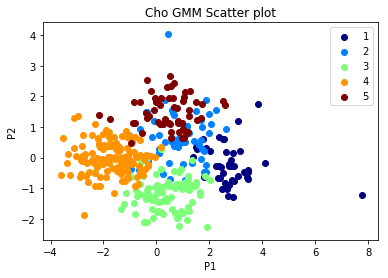

In [33]:
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt


pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_clean)
print(data_pca)



x = data_pca[:,0]
y = data_pca[:,1]
classes = np.unique(labels)
colors = [plt.cm.jet(i/float(len(classes)-1)) for i in range(len(classes))]
for i, u in enumerate(classes):
    xi = [x[j] for j  in range(len(x)) if labels[j] == u]
    yi = [y[j] for j  in range(len(x)) if labels[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.legend()
plt.title('Cho GMM Scatter plot')
plt.xlabel('P1')
plt.ylabel('P2')

# plt.show()
# fig = plt.figure()
plt.savefig('Cho GMM Scatter plot.png')

In [2]:
x = data_pca[:,0]
y = data_pca[:,1]
classes = np.unique(gtcluslist)
colors = [plt.cm.jet(i/float(len(classes)-1)) for i in range(len(classes))]
for i, u in enumerate(classes):
    xi = [x[j] for j  in range(len(x)) if gtcluslist[j] == u]
    yi = [y[j] for j  in range(len(x)) if gtcluslist[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.legend()
plt.title('Cho Ground Truth GMM Scatter plot')
plt.xlabel('P1')
plt.ylabel('P2')

# plt.show()
# fig = plt.figure()
plt.savefig('Cho Ground Truth GMM Scatter plot.png')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[[ 6.45931752e-01  1.64191313e+00]
 [-1.03856991e+00  7.45562180e-01]
 [ 5.90024976e-02  1.15130876e+00]
 [ 1.14847720e+00  1.04521877e+00]
 [ 8.34489354e-01  6.38589913e-01]
 [ 1.96652019e+00  1.41703305e+00]
 [ 8.08381017e-01  5.43951408e-01]
 [ 5.74841119e-01  6.29050335e-01]
 [ 6.45399283e-01  1.37898299e+00]
 [ 1.08023033e+00  4.98381105e-01]
 [ 3.31443566e-01  1.87527076e+00]
 [ 2.52454989e+00  1.84977219e+00]
 [ 1.03607285e+00  1.99460928e+00]
 [ 1.06054031e+00  2.12653331e+00]
 [ 5.48000778e-01  2.34946938e+00]
 [ 9.71840684e-01  1.12595336e+00]
 [ 9.49442262e-01  6.42631440e-01]
 [ 4.83989093e-01  1.13814330e+00]
 [-4.03783898e-01  1.48710385e+00]
 [ 1.00131864e+00  9.39366243e-01]
 [-1.85183886e-02  1.81875854e+00]
 [ 1.04460962e+00  6.32390941e-01]
 [-1.99217039e-01  2.17829676e+00]
 [ 8.28545108e-01  1.12872066e+00]
 [-6.55914603e-01 -4.12716584e-01]
 [-1.00247145e+00  6.99211372e-01]
 [ 8.19213317e-01  1.18264203e+00]
 [-1.88713267e+00 -6.22416091e-01]
 [ 9.30153217e-02  1

## IYER

In [3]:
import csv
import numpy as np
import pandas as pd

with open('iyer.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split('\t') for line in stripped if line)
    with open('test.csv', 'w') as out_file:
        writer = csv.writer(out_file)
#         writer.writerow(('title', 'intro'))
        writer.writerows(lines)
    
data = pd.read_csv("test.csv",header=None)

print(data)

# i=0
# while(i<len(data)):
#     if(data.iloc[i][1]==-1):
#         data.drop(data.index[i],inplace=True)
#         continue
#     else:
#         i=i+1
        
print(data.shape)

data_clean = np.zeros((data.shape[0],data.shape[1]-2))
for i in range(len(data)):
    for j in range(2,len(data.iloc[i])):
            data_clean[i][j-2] = data.iloc[i][j]
print(data_clean) 

print(data_clean.shape)

      0   1    2     3     4      5      6      7      8      9     10    11  \
0      1  -1  1.0  0.72  0.10   0.57   1.08   0.66   0.39   0.49  0.28  0.50   
1      2   1  1.0  1.58  1.05   1.15   1.22   0.54   0.73   0.82  0.82  0.90   
2      3   1  1.0  1.10  0.97   1.00   0.90   0.67   0.81   0.88  0.77  0.71   
3      4   1  1.0  0.97  1.00   0.85   0.84   0.72   0.66   0.68  0.47  0.61   
4      5   1  1.0  1.21  1.29   1.08   0.89   0.88   0.66   0.85  0.67  0.58   
5      6   1  1.0  1.45  1.44   1.12   1.10   1.15   0.79   0.77  0.78  0.71   
6      7   1  1.0  1.15  1.10   1.00   1.08   0.79   0.98   1.03  0.59  0.57   
7      8   1  1.0  1.32  1.35   1.13   1.00   0.91   1.22   1.05  0.58  0.57   
8      9   1  1.0  1.01  1.38   1.21   0.79   0.85   0.78   0.73  0.64  0.58   
9     10   1  1.0  0.85  1.03   1.00   0.81   0.82   0.73   0.51  0.24  0.54   
10    11   1  1.0  1.12  0.92   1.01   0.86   0.86   0.70   0.62  0.36  0.37   
11    12   1  1.0  1.23  1.21   0.95   0

In [35]:
import random
k=10
init_center=[]
centroids = dict()
for i in range(k):
    init_center.append(random.randrange(0, data_clean.shape[0]))
    centroids[i+1] = data_clean[init_center[i]]
print(init_center) 
print(centroids)

from operator import add 

def updateCentroid(cluslist,k):
    centroid=dict()
    for i in range(1,k+1):
        centroid[i] = [j for j, x in enumerate(cluslist) if x == i]
        

    for key, value in centroid.items():
        res=[0]*data_clean.shape[1]
        for item in value:
            result = list(map(add, res, data_clean[item])) 
            res=result
        res[:] = [x / len(value) for x in res]    
        centroids[key] = res 
    return centroids    
        
k=10
flag=False
while(True):
    cluslist=[]
    for i in range(data_clean.shape[0]):
        min = float("inf")
        for j in range(1,k+1):
            sum=0
            dist=0
            for m in range(len(data_clean[i])):
                sum=sum+(data_clean[i][m]-centroids[j][m])**2
            dist = sum**0.5  
            if(dist<min):
                min=dist
                cluster = j
        cluslist.append(cluster) 
    if(flag and (cluslist == prevcluslist)):
        break
    prevcluslist = cluslist.copy()  
    flag=True
    centroids = updateCentroid(cluslist,k)

    
print(cluslist)   
print(centroids)
                

[156, 166, 239, 455, 38, 471, 294, 104, 411, 449]
{1: array([1.  , 1.04, 0.92, 0.83, 0.9 , 0.74, 0.53, 0.4 , 0.47, 0.98, 0.81,
       0.9 ]), 2: array([1.  , 0.82, 0.87, 0.93, 0.93, 0.69, 0.58, 0.36, 0.29, 0.67, 0.71,
       0.94]), 3: array([1.  , 0.96, 1.4 , 1.15, 0.85, 0.5 , 0.36, 0.58, 0.52, 1.26, 1.28,
       1.28]), 4: array([1.  , 0.76, 0.76, 0.89, 1.1 , 1.77, 2.36, 3.43, 3.  , 4.49, 3.69,
       3.21]), 5: array([1.  , 1.32, 0.99, 0.78, 0.98, 0.6 , 0.6 , 0.65, 0.47, 0.53, 0.51,
       0.56]), 6: array([ 1.  ,  0.99,  1.32,  1.65,  0.75,  5.76,  8.51, 10.02,  9.28,
       12.34,  9.12,  8.81]), 7: array([1.  , 1.14, 1.94, 1.42, 1.01, 1.04, 0.83, 0.75, 0.41, 0.23, 0.2 ,
       0.17]), 8: array([1.  , 0.98, 0.57, 0.87, 0.72, 0.45, 0.48, 0.76, 0.69, 1.11, 1.07,
       1.21]), 9: array([1.  , 0.44, 0.75, 0.8 , 0.72, 1.51, 3.27, 5.54, 4.37, 2.42, 3.97,
       3.26]), 10: array([1.  , 1.15, 0.93, 1.17, 1.78, 2.18, 1.96, 2.01, 3.03, 3.35, 2.53,
       2.59])}
[2, 2, 2, 2, 2, 2, 2, 2, 2

In [36]:
Mu = pd.DataFrame(centroids)
Mu.rename(columns=lambda x: x-1, inplace=True)
Mu = Mu.T
print(Mu.shape)
print(Mu)
Muu = np.zeros((Mu.shape[0],Mu.shape[1]))
for i in range(len(Mu)):
    for j in range(len(Mu.iloc[i])):
            Muu[i][j] = Mu.iloc[i][j]
print(Muu) 

(10, 12)
    0         1         2         3         4          5          6   \
0  1.0  0.993488  0.888256  0.926163  0.907791   0.716860   0.620116   
1  1.0  0.942489  0.953668  0.924498  0.884891   0.701528   0.565197   
2  1.0  1.001132  0.996792  1.060943  1.137736   1.240943   1.381887   
3  1.0  1.174118  1.302941  1.152941  1.216471   1.075882   1.151765   
4  1.0  0.911509  1.216038  1.387736  1.280755   1.887547   1.930377   
5  1.0  2.670000  2.410000  3.750000  6.180000  38.800000  86.920000   
6  1.0  1.779048  3.484762  5.691905  4.040952   2.688571   2.355714   
7  1.0  0.971563  1.165000  1.519062  1.763750   4.207187   4.102187   
8  1.0  1.123333  2.196667  3.778333  3.393333  10.598333  13.695000   
9  1.0  1.021053  1.150000  1.242105  1.465789   2.756842   3.958421   

          7          8         9         10        11  
0   0.615698   0.726744  1.078140  1.180465  1.303837  
1   0.485153   0.454410  0.645808  0.611048  0.637511  
2   1.616604   1.803019  2.220

In [ ]:
exp,log_likelihood_record,pi,mu,BigSigma = ExpMax(data_clean,10,1e-4,100,1e-6,4)
print(log_likelihood_record)
print(pi)
print(mu)
print(BigSigma)


labels=[-1]*len(data_clean)
for i in range(len(data_clean)):
    labels[i] = (list(exp[i]).index(max(exp[i])))+1
    
print(labels)    

Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello


In [20]:
cluslist = labels.copy()
gtcluslist = list(data.iloc[:,1])
# print(gtcluslist)

P = np.zeros((len(gtcluslist),len(gtcluslist)))
C = np.zeros((len(cluslist),len(cluslist)))

for i in range(len(cluslist)):
    for j in range(i,len(cluslist)):
        if(i==j):
            C[i][j] = 1    
        elif(cluslist[i]==cluslist[j]):
            C[i][j] = 1
            C[j][i] = 1
            
for i in range(len(gtcluslist)):
    for j in range(i,len(gtcluslist)):
        if(i==j):
            P[i][j] = 1    
        elif(gtcluslist[i]==gtcluslist[j]):
            P[i][j] = 1
            P[j][i] = 1
          
        
MTP, MTN, MFP, MFN = 0,0,0,0

for i in range(len(P)):
    for j in range(len(P[0])):
        if(C[i][j]==1 and P[i][j]==1):
            MTP += 1
        elif(C[i][j]==0 and P[i][j]==0):
            MTN += 1
        elif(C[i][j]==1 and P[i][j]==0):
            MFP += 1
        elif(C[i][j]==0 and P[i][j]==1):
            MFN += 1
            
            
rand_index = (MTP+MTN)/(MTP+MTN+MFP+MFN)    

jaccard = (MTP)/(MTP+MFP+MFN)

print("Rand index: ",rand_index)
print("Jaccard index: ",jaccard)


        

Rand index:  0.7760027535738471
Jaccard index:  0.3625009316737119


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[[-2.2045084   1.20243126]
 [-1.55287224  0.73850778]
 [-1.54689273  1.08299221]
 ...
 [ 4.36826438 -1.34298402]
 [ 4.92751914 -0.81675341]
 [ 5.75114484  0.09822077]]


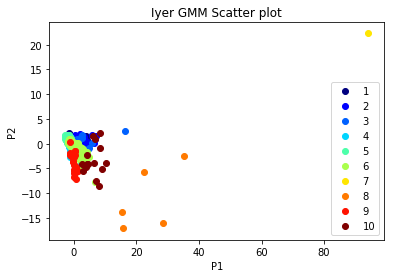

In [21]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_clean)
print(data_pca)



x = data_pca[:,0]
y = data_pca[:,1]
classes = np.unique(labels)
colors = [plt.cm.jet(i/float(len(classes)-1)) for i in range(len(classes))]
for i, u in enumerate(classes):
    xi = [x[j] for j  in range(len(x)) if labels[j] == u]
    yi = [y[j] for j  in range(len(x)) if labels[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.legend()
plt.title('Iyer GMM Scatter plot')
plt.xlabel('P1')
plt.ylabel('P2')

# plt.show()
# fig = plt.figure()
plt.savefig('Iyer GMM Scatter plot.png')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[[-2.2045084   1.20243126]
 [-1.55287224  0.73850778]
 [-1.54689273  1.08299221]
 ...
 [ 4.36826438 -1.34298402]
 [ 4.92751914 -0.81675341]
 [ 5.75114484  0.09822077]]


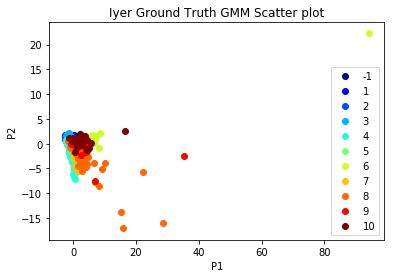

In [4]:
x = data_pca[:,0]
y = data_pca[:,1]
classes = np.unique(gtcluslist)
colors = [plt.cm.jet(i/float(len(classes)-1)) for i in range(len(classes))]
for i, u in enumerate(classes):
    xi = [x[j] for j  in range(len(x)) if gtcluslist[j] == u]
    yi = [y[j] for j  in range(len(x)) if gtcluslist[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.legend()
plt.title('Iyer Ground Truth GMM Scatter plot')
plt.xlabel('P1')
plt.ylabel('P2')

# plt.show()
# fig = plt.figure()
plt.savefig('Iyer Ground Truth GMM Scatter plot.png')